# Image processing 1: Instagram filters

# عادل محمود عبد الخالق عبد السلام 1400738

# adelmahmoud1997@gmail.com

In [1]:
import cv2
import numpy as np
import ctypes
from matplotlib import pyplot as plt

If α<1, the color levels will be compressed and the result will be an image with less contrast.

In [2]:
def increase_contasrt(image,alpha = 1.0,beta = 0):
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
    return  new_image

Gamma correction: First, our image pixel intensities must be scaled from the range [0,255] to [0,1.0]. we obtain our output gamma corrected image by applying the following equation: 
O = I ^ (1 / G) 
Where I is our input image and G is our gamma value. The output image O is then scaled back to the range [0,255].

In [3]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

In [4]:
def apply_color_overlay(image,intensity = 0.5,blue = 0, green = 0, red = 0):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
    image_h, image_w, image_c = image.shape
    color_bgra = (blue, green, red,1)
    overlay = np.full((image_h,image_w,4),color_bgra, dtype= 'uint8')
    cv2.addWeighted(overlay,intensity,image,1.0,0,image)
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    return image


In [5]:
def insta_like(image,filter_name):
    if filter_name == 'inkwell':
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        inkwell = adjust_gamma(img_gray.copy(),1.1)
        return inkwell
    elif filter_name =='gotham':
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gotham = adjust_gamma(img_gray.copy(),0.55)
        return gotham
    elif filter_name == 'lordKelvin':
        x = apply_color_overlay(image.copy(),1.2,20,66,130)
        return adjust_gamma(x.copy(),1.1)
    elif filter_name == 'popRocket':
        x=  apply_color_overlay(image.copy(),intensity= 0.7 , green = 0,blue= 5,red = 190)
        return adjust_gamma(x.copy(),1.5)
    elif filter_name == 'lily':
        y = apply_color_overlay(image.copy(), intensity=0.4, blue=0, red=0,green= 200)
        return adjust_gamma(y.copy(),0.6)
    elif filter_name == 'nashville':
        y =apply_color_overlay(image.copy(),intensity= 0.4 , green = 255,blue= 255,red = 255)
        x = adjust_gamma(y.copy(),0.7)
        return increase_contasrt(x.copy(), 0.9, 2.5)
    elif filter_name == 'lomo-fi':
        x = increase_contasrt(image.copy(), 1.4, 0.7)
        return adjust_gamma(x.copy(),0.6)
    elif filter_name == '1977':
        x =apply_color_overlay(image.copy(),0.9,50,30,90)
        y= increase_contasrt(x.copy(), 0.9, 0.7)
        return adjust_gamma(y.copy(),0.7)
    else:
        print('filter not supported')

In [6]:
# image path
image_path = 'C:\\Users\Adel Mahmoud\Desktop\AdelMahmoud.jpeg'
image = cv2.imread(image_path,1)

## Original photo:

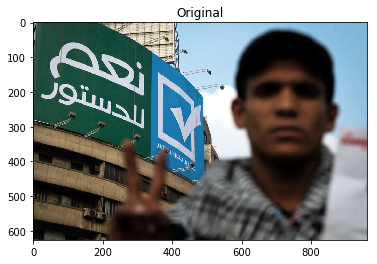

In [7]:
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.title('Original')
plt.show()

## InkWell filter:
-> Convert photo to gray scale.(inkWell filter gets the black and white version of the photo.)

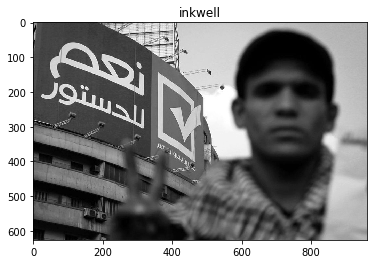

In [8]:
inkwell_image = insta_like(image, 'inkwell')
plt.imshow(inkwell_image,cmap='gray')
plt.title('inkwell')
plt.show()

## Gotham filter:
-> Convert to gray scale image then increase darkness by adjusting gamma effect.(Gotham filter is the darker version of the black and white version of the photo)

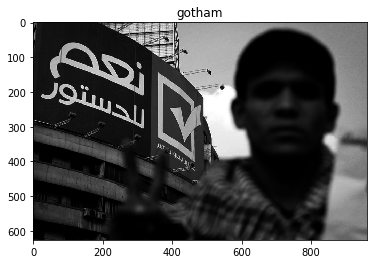

In [9]:
gotham_image = insta_like(image, 'gotham')
plt.imshow(gotham_image,cmap='gray')
plt.title('gotham')
plt.show()

## LordKelvin filter:
-> add a sepia color overlay and adjusting its intensity.


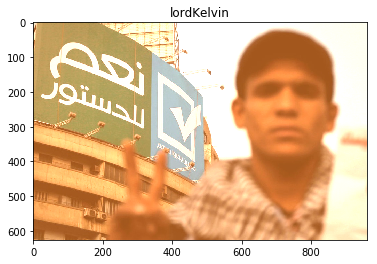

In [10]:
sepia_image = insta_like(image, 'lordKelvin')
imageRGB = cv2.cvtColor(sepia_image, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.title('lordKelvin')
plt.show()

## 1977 filter:
-> add a reddish brown overlay, increase brightness and adjust contrast. 

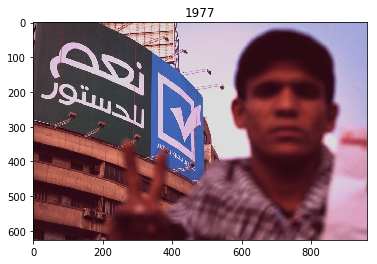

In [11]:
sepia_image = insta_like(image, '1977')
imageRGB = cv2.cvtColor(sepia_image, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.title('1977')
plt.show()

## popRocket filter:
-> adding a red overlay, adjusting its intensity and adding gamma effect.

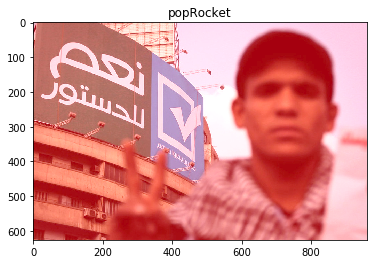

In [12]:
reddish_image = insta_like(image, 'popRocket')
gray = cv2.cvtColor(reddish_image, cv2.COLOR_BGR2RGB)
plt.imshow(gray)
plt.title('popRocket')
plt.show()

## lily filter:
-> adding a green color overlay then adjusting gamma effect 

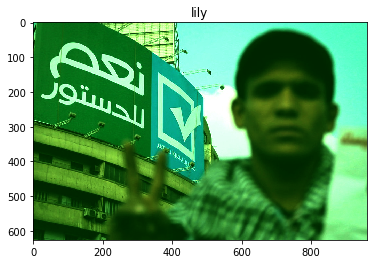

In [13]:
green_image = insta_like(image, 'lily')
gray = cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB)
plt.imshow(gray)
plt.title('lily')
plt.show()

## Clarendon or lomo-fi: 
-> increasing contrast using increase_contrast  function that uses linear transformation using the parameters alpha and beta and adjusting_gamma function, where increasing contrast makes dark pixels becomes darker while light pixels becomes lighter.

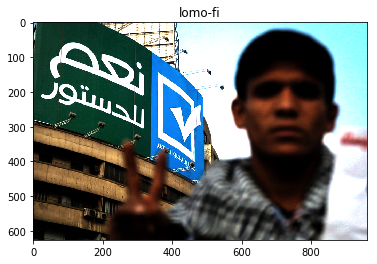

In [14]:
lomo_image = insta_like(image, 'lomo-fi')
gray = cv2.cvtColor(lomo_image, cv2.COLOR_BGR2RGB)
plt.imshow(gray)
plt.title('lomo-fi')
plt.show()

## Nashville:
-> Add white color using apply color overlay function then increase contrast using increase contrast function and adjusting gamma effect.(photo becomes white and pale)

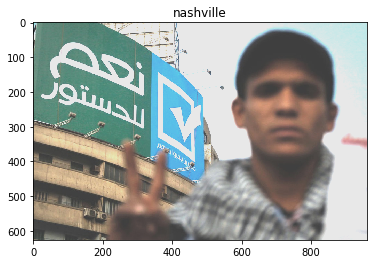

In [15]:
nash_image = insta_like(image, 'nashville')
gray = cv2.cvtColor(nash_image, cv2.COLOR_BGR2RGB)
plt.imshow(gray)
plt.title('nashville')
plt.show()